In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
df = pd.read_csv('../../data/csl/CSL_hety_PI_comp.csv', index_col=0)
corr_df = pd.read_csv('../../data/csl/Features/PI_he_ty_noSite.csv', index_col=0, header=None, delimiter='\t')
corr_vars = list(corr_df.index.values)

In [8]:
%%time
from mwb_bootstrap import bootstrap_stat
from sklearn.ensemble import GradientBoostingClassifier

site_stats = pd.DataFrame()
site_feats = pd.DataFrame()

# Loop through Sites
for site in [41, 44, 48, 49, 51]:
    site_df = df[df['Sitenum'] == site]
    X = site_df.drop('high_EBL', axis=1, inplace=False)
    X = X[corr_vars]
    y = site_df['high_EBL'].values
    
    clf = GradientBoostingClassifier(n_estimators=70, criterion="friedman_mse",max_depth=11, 
                          min_samples_leaf=50, min_samples_split=900,max_leaf_nodes=None,
                          max_features=12,subsample=0.9, learning_rate=0.1,random_state=7)
    stats_df, feats_df, X_train = bootstrap_stat(X, y, clf, test_size=0.25, 
                                                 sample_weights=True, nsamples=20, under=False)
    stats_df.loc['mean'] = stats_df.mean()
    site_stats[site] = stats_df.loc['mean',:]
    
    feats_df['mean'] = feats_df.mean(axis=1)
    if site_feats.empty:
        feats_df.sort_values(by='mean', inplace=True, ascending=False)
        site_feats[site] = feats_df['mean']
    else:
        this_site = pd.DataFrame(feats_df['mean'])
        this_site.columns = [site]
        site_feats = site_feats.merge(this_site, left_index=True, 
                                      right_index=True, how='left')
    
site_stats

CPU times: user 1min 31s, sys: 47.9 ms, total: 1min 32s
Wall time: 1min 32s


,41,44,48,49,51
recall,0.750373,0.855654,0.526506,0.894203,0.381395
prec,0.103423,0.161930,0.054547,0.176439,0.034865
MCC,0.236145,0.294122,0.128121,0.332610,0.088667
PR_AUC,0.181086,0.292690,0.069785,0.262366,0.052782
roc_auc,0.881882,0.854826,0.810168,0.883033,0.763495


<Figure size 432x288 with 0 Axes>

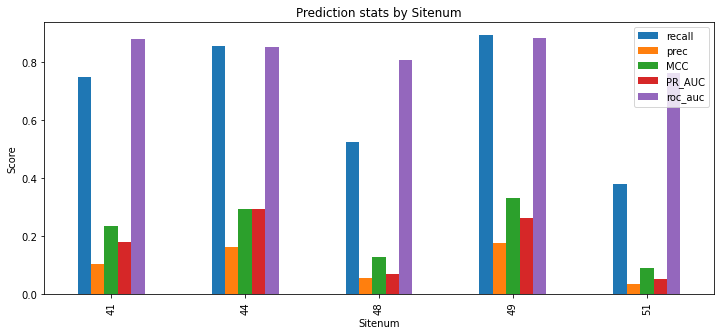

In [9]:
fig = plt.figure()
ax = site_stats.T.plot.bar(figsize=(12,5), title="Prediction stats by Sitenum")
ax.set_ylabel("Score")
ax.set_xlabel("Sitenum")
plt.draw()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

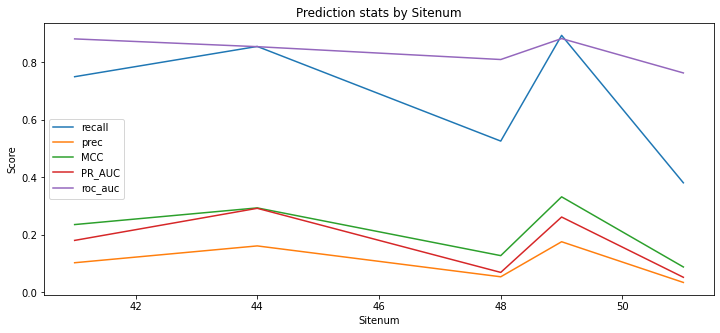

In [10]:
fig = plt.figure()
ax = site_stats.T.plot(figsize=(12,5), title="Prediction stats by Sitenum")
ax.set_ylabel("Score")
ax.set_xlabel("Sitenum")
plt.draw()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()

In [11]:
site_feats

,41,44,48,49,51
Delmode,0.129777,0.237246,0.060253,0.226282,0.093035
Delfetalpos,0.086013,0.001191,0.002327,0.085528,0.014635
CS_FTP,0.054955,0.072612,0.007772,0.032322,0.058300
Anteanemia,0.045004,0.000341,0.000829,0.009400,0.000000
Presentdel,0.044315,0.001589,0.005821,0.002130,0.005032
...,...,...,...,...,...
Activeherpes,0.000000,0.000000,0.000000,0.000048,0.000852
Hxheartdis,0.000000,0.003303,0.001081,0.000126,0.000000
Hxanemia,0.000000,0.000255,0.000704,0.055324,0.000000
HospElectInd,0.000000,0.000000,0.000000,0.001453,0.000000


['Delmode' 'Delfetalpos' 'CS_FTP' 'Anteanemia' 'Presentdel' 'transfus_yes'
 'MthInd_Miso' 'MthInd_Mec' 'Admcontract' 'BESTGA' 'Lac_None' 'TrialLabor'
 'new_BMI' 'AdmSBP' 'AdmBishop' 'Augment' 'Analgesia' 'AdmDBP' 'new_age'
 'Dilat_lst' 'Episiotomy' 'HosEpitype' 'CS_UScar' 'Education' 'Lac_Min']


<Figure size 432x288 with 0 Axes>

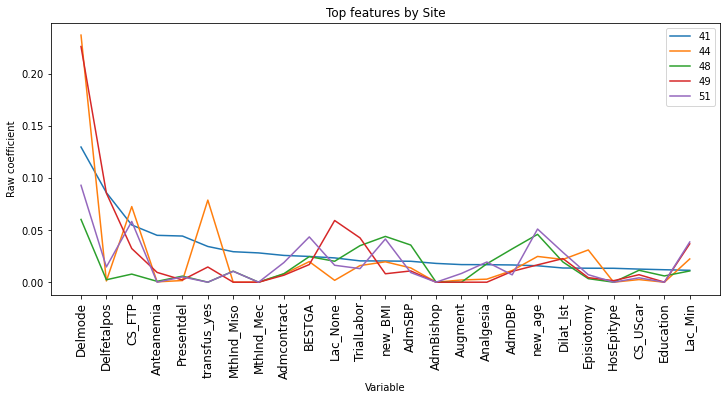

In [12]:
fig = plt.figure()
num_labels = 25
x_labels = site_feats.index[0:num_labels].values
print(x_labels)
ax = site_feats.iloc[0:num_labels,:].plot(figsize=(12,5), title="Top features by Site")
ax.set_ylabel("Raw coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

In [13]:
site_feats[41].sort_values(ascending=False)[0:12]

Delmode         0.129777
Delfetalpos     0.086013
CS_FTP          0.054955
Anteanemia      0.045004
Presentdel      0.044315
transfus_yes    0.034298
MthInd_Miso     0.029273
MthInd_Mec      0.028121
Admcontract     0.025707
BESTGA          0.024719
Lac_None        0.023324
TrialLabor      0.020477
Name: 41, dtype: float64

In [14]:
site_feats[44].sort_values(ascending=False)[0:12]

Delmode            0.237246
transfus_yes       0.078836
prelaborCD         0.074644
CS_FTP             0.072612
Admefface          0.051660
Episiotomy         0.030966
new_age            0.024733
Lac_Min            0.022332
Antefetdistress    0.022106
Dilat_lst          0.021836
BESTGA             0.019754
new_BMI            0.019587
Name: 44, dtype: float64

In [15]:
site_feats[48].sort_values(ascending=False)[0:12]

Insurance         0.129630
Admefface         0.060327
Delmode           0.060253
new_age           0.045932
new_BMI           0.043954
AdmSBP            0.035675
TrialLabor        0.035069
AdmDBP            0.031993
prelaborCD        0.031446
BESTGA            0.024583
high_Gravidity    0.024216
momrace_new       0.021344
Name: 48, dtype: float64

In [16]:
site_feats[49].sort_values(ascending=False)[0:12]

Delmode        0.226282
Delfetalpos    0.085528
Admefface      0.069588
Lac_None       0.059224
Hxanemia       0.055324
TrialLabor     0.042555
Lac_Min        0.036816
CS_FTP         0.032322
Dilat_lst      0.022657
Intrafever     0.020496
uscar          0.017109
BESTGA         0.016926
Name: 49, dtype: float64

In [17]:
pd.DataFrame(feats_df['mean']).index

Index(['Accrete', 'Activeherpes', 'AdmBishop', 'Admcervpos', 'Admconsistency',
       'Admcontract', 'AdmDBP', 'Admefface', 'Admpresent', 'Admreason',
       ...
       'TD_nos', 'ThreatenedPB', 'threatpb9', 'transfus_yes', 'TrialLabor',
       'UnspecHBP', 'Urupture', 'uscar', 'version9', 'vertex'],
      dtype='object', length=196)

In [18]:
#site_feats = pd.DataFrame()
#site_feats['s41'] = feats_df['mean']
site_feats['s44'] = feats_df['mean']
site_feats

,41,44,48,49,51,s44
Delmode,0.129777,0.237246,0.060253,0.226282,0.093035,0.093035
Delfetalpos,0.086013,0.001191,0.002327,0.085528,0.014635,0.014635
CS_FTP,0.054955,0.072612,0.007772,0.032322,0.058300,0.058300
Anteanemia,0.045004,0.000341,0.000829,0.009400,0.000000,0.000000
Presentdel,0.044315,0.001589,0.005821,0.002130,0.005032,0.005032
...,...,...,...,...,...,...
Activeherpes,0.000000,0.000000,0.000000,0.000048,0.000852,0.000852
Hxheartdis,0.000000,0.003303,0.001081,0.000126,0.000000,0.000000
Hxanemia,0.000000,0.000255,0.000704,0.055324,0.000000,0.000000
HospElectInd,0.000000,0.000000,0.000000,0.001453,0.000000,0.000000


In [19]:
s49_df = df[df['Sitenum'] == 49]
X = s49_df.drop('trans_loss', axis=1, inplace=False)
X = X[corr_vars]
y = s49_df['trans_loss'].values
X

KeyError: "['trans_loss'] not found in axis"

In [ ]:
%%time
from mwb_bootstrap import bootstrap_stat
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=70, criterion="friedman_mse",max_depth=11, min_samples_leaf=50,
                                     min_samples_split=900,max_leaf_nodes=None,max_features=12,subsample=0.9,
                                     learning_rate=0.1,random_state=7)
print(clf.get_params())
#stats_df, feats_df, X_train = bootstrap_stat(X, y, clf, nsamples=25, under=True)
stats_df, feats_df, X_train = bootstrap_stat(X, y, clf, test_size=0.2, sample_weights=True, nsamples=10, 
                                             under=False)
stats_df.loc['mean'] = stats_df.mean()
stats_df.loc['mean',:]

In [ ]:
feats_df['mean'] = feats_df.mean(axis=1)
feats_df.sort_values(by='mean', inplace=True, ascending=False)
feats_df.head(30)

In [ ]:
s44_df = df[df['Sitenum'] == 44]
X = s44_df.drop('trans_loss', axis=1, inplace=False)
X = X[corr_vars]
y = s44_df['trans_loss'].values
X

In [ ]:
%%time
from mwb_bootstrap import bootstrap_stat
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=70, criterion="friedman_mse",max_depth=11, min_samples_leaf=50,
                                     min_samples_split=900,max_leaf_nodes=None,max_features=12,subsample=0.9,
                                     learning_rate=0.1,random_state=7)
print(clf.get_params())
#stats_df, feats_df, X_train = bootstrap_stat(X, y, clf, nsamples=25, under=True)
stats_df, feats_df, X_train = bootstrap_stat(X, y, clf, test_size=0.2, sample_weights=True, nsamples=10, 
                                             under=False)
stats_df.loc['mean'] = stats_df.mean()
stats_df.loc['mean',:]

In [ ]:
feats_df['mean'] = feats_df.mean(axis=1)
feats_df.sort_values(by='mean', inplace=True, ascending=False)
feats_df.head(30)

In [ ]:
stats_df